In [1]:
# Dependencies
import pandas as pd
import numpy as np
import os
import webbrowser
import io
import matplotlib
import matplotlib.pyplot as plt

In [2]:
PA_Data_csv = "Datasets/PA Retail Data.csv"

In [3]:
# Read with pandas
PA_Data_df = pd.read_csv(PA_Data_csv)
PA_Data_df.head()

,id,Geo Footnote,Geographic Area Name,2017 NAICS code,2017 NAICS Footnote,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Annual payroll ($1,000)","First-quarter payroll ($1,000)",Number of employees,"Range indicating percent of total sales, value of shipments, or revenue imputed",Range indicating percent of total annual payroll imputed,Range indicating percent of total employees imputed
0,0400000US42,NaN,Pennsylvania,44-45,NaN,Retail trade,2017,25427,42514,234836340,17354005,4221872,662560,Less than 10%,10% to less than 20%,20% to less than 30%
1,0400000US42,NaN,Pennsylvania,441,NaN,Motor vehicle and parts dealers,2017,3455,4796,45990378,3450296,825940,84065,10% to less than 20%,10% to less than 20%,10% to less than 20%
2,0400000US42,NaN,Pennsylvania,442,NaN,Furniture and home furnishings stores,2017,1252,1942,3839462,496470,118744,16970,10% to less than 20%,10% to less than 20%,20% to less than 30%
3,0400000US42,NaN,Pennsylvania,443,NaN,Electronics and appliance stores,2017,733,1172,2669309,322363,80998,11985,10% to less than 20%,20% to less than 30%,10% to less than 20%
4,0400000US42,NaN,Pennsylvania,444,NaN,Building material and garden equipment and sup...,2017,2189,3168,12886105,1492989,349910,49809,Less than 10%,Less than 10%,Less than 10%


In [4]:
# Delete extraneous column
PA_Data_df = PA_Data_df.drop(columns=['Geo Footnote', '2017 NAICS Footnote', 'id', '2017 NAICS code', 
                            'Annual payroll ($1,000)', 'First-quarter payroll ($1,000)', 
                            'Number of employees', 'Range indicating percent of total annual payroll imputed', 
                            'Range indicating percent of total employees imputed', 
                           ])


PA_Data_df

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed"
0,Pennsylvania,Retail trade,2017,25427,42514,234836340,Less than 10%
1,Pennsylvania,Motor vehicle and parts dealers,2017,3455,4796,45990378,10% to less than 20%
2,Pennsylvania,Furniture and home furnishings stores,2017,1252,1942,3839462,10% to less than 20%
3,Pennsylvania,Electronics and appliance stores,2017,733,1172,2669309,10% to less than 20%
4,Pennsylvania,Building material and garden equipment and sup...,2017,2189,3168,12886105,Less than 10%
...,...,...,...,...,...,...,...
158,Pennsylvania,All other miscellaneous store retailers (excep...,2017,747,937,675185,10% to less than 20%
159,Pennsylvania,Electronic shopping and mail-order houses,2017,1229,1262,61728619,Less than 10%
160,Pennsylvania,Vending machine operators,2017,141,169,409314,Less than 10%
161,Pennsylvania,Fuel dealers,2017,458,620,2851961,20% to less than 30%


In [5]:
PA_Data_df = PA_Data_df.replace({'D': '0'})
PA_Data_df

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed"
0,Pennsylvania,Retail trade,2017,25427,42514,234836340,Less than 10%
1,Pennsylvania,Motor vehicle and parts dealers,2017,3455,4796,45990378,10% to less than 20%
2,Pennsylvania,Furniture and home furnishings stores,2017,1252,1942,3839462,10% to less than 20%
3,Pennsylvania,Electronics and appliance stores,2017,733,1172,2669309,10% to less than 20%
4,Pennsylvania,Building material and garden equipment and sup...,2017,2189,3168,12886105,Less than 10%
...,...,...,...,...,...,...,...
158,Pennsylvania,All other miscellaneous store retailers (excep...,2017,747,937,675185,10% to less than 20%
159,Pennsylvania,Electronic shopping and mail-order houses,2017,1229,1262,61728619,Less than 10%
160,Pennsylvania,Vending machine operators,2017,141,169,409314,Less than 10%
161,Pennsylvania,Fuel dealers,2017,458,620,2851961,20% to less than 30%


In [6]:
PA_Data_df.loc[PA_Data_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
PA_Data_df.loc[PA_Data_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0

PA_Data_df.head()

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed",eCommerce?
0,Pennsylvania,Retail trade,2017,25427,42514,234836340,Less than 10%,0.0
1,Pennsylvania,Motor vehicle and parts dealers,2017,3455,4796,45990378,10% to less than 20%,0.0
2,Pennsylvania,Furniture and home furnishings stores,2017,1252,1942,3839462,10% to less than 20%,0.0
3,Pennsylvania,Electronics and appliance stores,2017,733,1172,2669309,10% to less than 20%,0.0
4,Pennsylvania,Building material and garden equipment and sup...,2017,2189,3168,12886105,Less than 10%,0.0


In [7]:
PA_Data_df['Sales, value of shipments, or revenue ($1,000)'] = PA_Data_df['Sales, value of shipments, or revenue ($1,000)'].astype(float)

In [8]:
ecommerce_totals = PA_Data_df.groupby('eCommerce?')['Sales, value of shipments, or revenue ($1,000)'].sum()
ecommerce_totals

eCommerce?
0.0    988995843.0
1.0    185185857.0
Name: Sales, value of shipments, or revenue ($1,000), dtype: float64

In [9]:
#Create Pie Chart
labels = "eCommerce", "Retail"
value = [ecommerce_totals[1.0], ecommerce_totals[0.0]]
colors = ["purple", "blue"]
explode = (0.3,0)

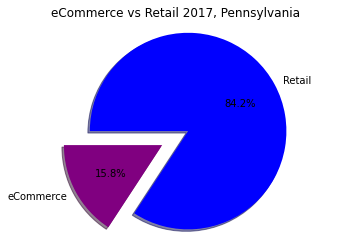

In [10]:
# Create a pie chart based upon the above data
plt.pie(value, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("eCommerce vs Retail 2017, Pennsylvania")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.savefig("../Images/PyPies.png")

# Establishments

In [11]:
PA_Data_df.loc[PA_Data_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
PA_Data_df.loc[PA_Data_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0

PA_Data_df

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed",eCommerce?
0,Pennsylvania,Retail trade,2017,25427,42514,234836340.0,Less than 10%,0.0
1,Pennsylvania,Motor vehicle and parts dealers,2017,3455,4796,45990378.0,10% to less than 20%,0.0
2,Pennsylvania,Furniture and home furnishings stores,2017,1252,1942,3839462.0,10% to less than 20%,0.0
3,Pennsylvania,Electronics and appliance stores,2017,733,1172,2669309.0,10% to less than 20%,0.0
4,Pennsylvania,Building material and garden equipment and sup...,2017,2189,3168,12886105.0,Less than 10%,0.0
...,...,...,...,...,...,...,...,...
158,Pennsylvania,All other miscellaneous store retailers (excep...,2017,747,937,675185.0,10% to less than 20%,0.0
159,Pennsylvania,Electronic shopping and mail-order houses,2017,1229,1262,61728619.0,Less than 10%,1.0
160,Pennsylvania,Vending machine operators,2017,141,169,409314.0,Less than 10%,0.0
161,Pennsylvania,Fuel dealers,2017,458,620,2851961.0,20% to less than 30%,0.0


In [12]:
PA_Data_df['Number of establishments'] = PA_Data_df['Number of establishments'].astype(float)

In [16]:
PAestablishments_total = PA_Data_df.groupby('eCommerce?')['Number of establishments'].sum()
PAestablishments_total

eCommerce?
0.0    208784.0
1.0      3786.0
Name: Number of establishments, dtype: float64

In [14]:
#Create Pie Chart
labels = "eCommerce", "Retail"
value = [establishments_total[1.0], establishments_total[0.0]]
colors = ["pink", "green"]
explode = (0.3,0)

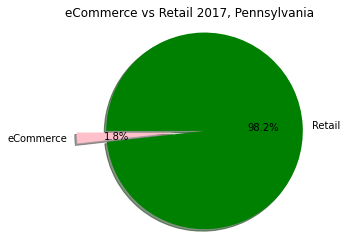

In [15]:
# Create a pie chart based upon the above data
plt.pie(value, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("eCommerce vs Retail 2017, Pennsylvania")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.savefig("../Images/PyPies.png")

In [27]:
# Create Bar Chart
labels = ["eCommerce", "Retail"]
PAestablishments = [PAestablishments_total[1.0], PAestablishments_total[0.0]]
x_axis = np.arange(len(PAestablishments))
colors = ["purple", "blue"]

Text(0, 0.5, 'Number of Establishments')

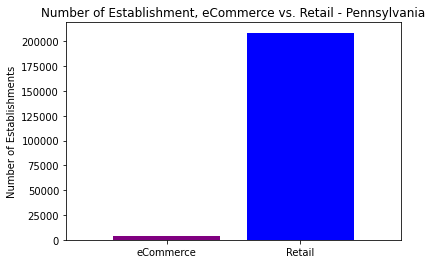

In [28]:
plt.bar(x_axis, PAestablishments, color=colors, align="center")
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)

# Set the limits of the x & y axis
plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Number of Establishment, eCommerce vs. Retail - Pennsylvania")
plt.ylabel("Number of Establishments")
